In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import glob
import os
from scipy.interpolate import make_interp_spline
import numpy as np

In [17]:
# Configurações de estilo dos gráficos
sns.set(style="whitegrid")

# Caminho para os arquivos
all_files = glob.glob("bateryAnalisys_new_batery2.csv")

# Junta todos os arquivos em um único DataFrame
li = []
for filename in all_files:
    df = pd.read_csv(filename)
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    li.append(df)


In [18]:
# Concatenar todos os DataFrames da lista em um único DataFrame
frame = pd.concat(li, axis=0, ignore_index=True)

# Ordena por 'timestamp' para garantir que os dados estão em ordem cronológica
frame = frame.sort_values('timestamp').reset_index(drop=True)

In [19]:
frame

,timestamp,battery_value,tensao,corrente
0,2025-05-21 08:26:15,0,3576,-150
1,2025-05-21 08:31:22,0,3815,-150
2,2025-05-21 08:36:29,0,3894,-150
3,2025-05-21 08:41:35,0,3980,-151
4,2025-05-21 08:46:42,0,4078,-150
5,2025-05-21 08:51:49,0,4164,-150
6,2025-05-21 08:56:55,0,4199,-95
7,2025-05-21 09:02:02,0,4201,-83
8,2025-05-21 09:07:09,0,4201,-58
9,2025-05-21 09:12:16,0,4202,-41


In [8]:
# Função modificada para plotar a série temporal com escalas específicas
def plot_time_series(df, variable, xlabel, ylabel, title, color):
    plt.figure(figsize=(10, 5))
    plt.plot(df['timestamp'], df[variable], color=color)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    # Eixo X: ticks principais de 1 em 1 hora, formato HH:MM
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

    # Rotaciona as labels do eixo X para facilitar a leitura
    plt.xticks(rotation=45)

    # Eixo Y: escala de 100 em 100 mV
    min_y = df[variable].min()
    max_y = df[variable].max()
    plt.yticks(np.arange(int(min_y // 100) * 100, int(max_y // 100 + 2) * 100, 100))

    # Grid e layout
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()

    plt.show()

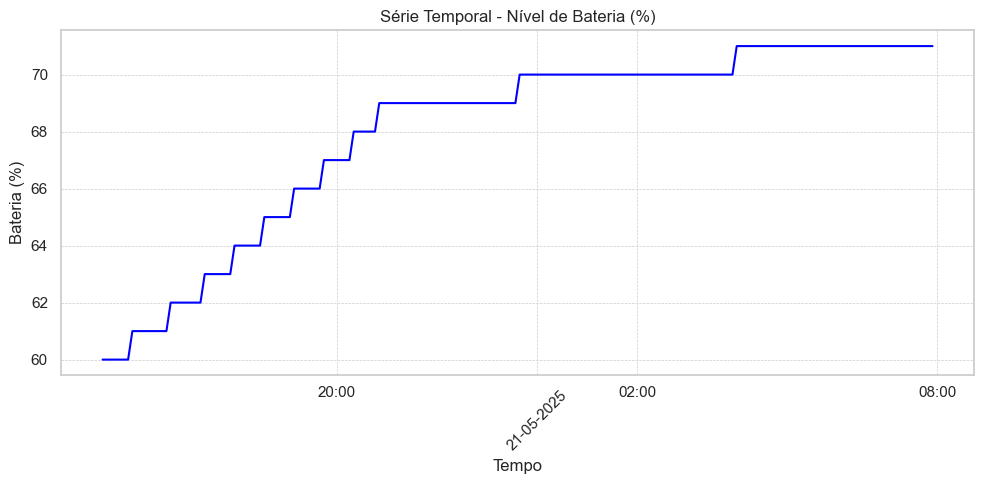

In [6]:
plot_time_series(frame, 'battery_value', 'Tempo', 'Bateria (%)', 'Série Temporal - Nível de Bateria (%)', 'blue')

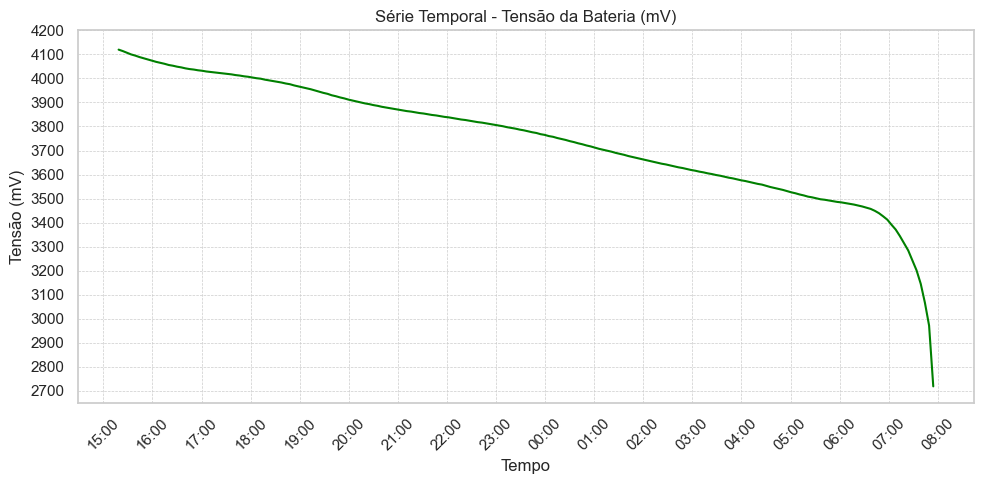

In [9]:
plot_time_series(frame, 'tensao', 'Tempo', 'Tensão (mV)', 'Série Temporal - Tensão da Bateria (mV)', 'green')

In [22]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# Função para plotar tensão e corrente (em módulo) ao longo do tempo
def plot_time_series(df, xlabel, title, color_voltage='green', color_current='blue'):
    fig, ax1 = plt.subplots(figsize=(12, 5))

    # Plot da tensão (eixo Y à esquerda)
    ax1.plot(df['timestamp'], df['tensao'], color=color_voltage, label='Tensão (mV)')
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel('Tensão (mV)', color=color_voltage)
    ax1.tick_params(axis='y', labelcolor=color_voltage)
    ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Escala de 100 em 100 mV
    min_y = df['tensao'].min()
    max_y = df['tensao'].max()
    ax1.set_yticks(np.arange(int(min_y // 100) * 100, int(max_y // 100 + 2) * 100, 100))

    # Eixo X: 1 hora de intervalo
    ax1.xaxis.set_major_locator(mdates.MinuteLocator(interval=10))
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    plt.xticks(rotation=45)

    # Plot da corrente (módulo) no eixo Y à direita
    ax2 = ax1.twinx()
    ax2.plot(df['timestamp'], np.abs(df['corrente']), color=color_current, linestyle='--', label='Corrente |mA|')
    ax2.set_ylabel('Corrente (mA)', color=color_current)
    ax2.tick_params(axis='y', labelcolor=color_current)

    # Título e layout
    plt.title(title)
    fig.tight_layout()
    plt.show()


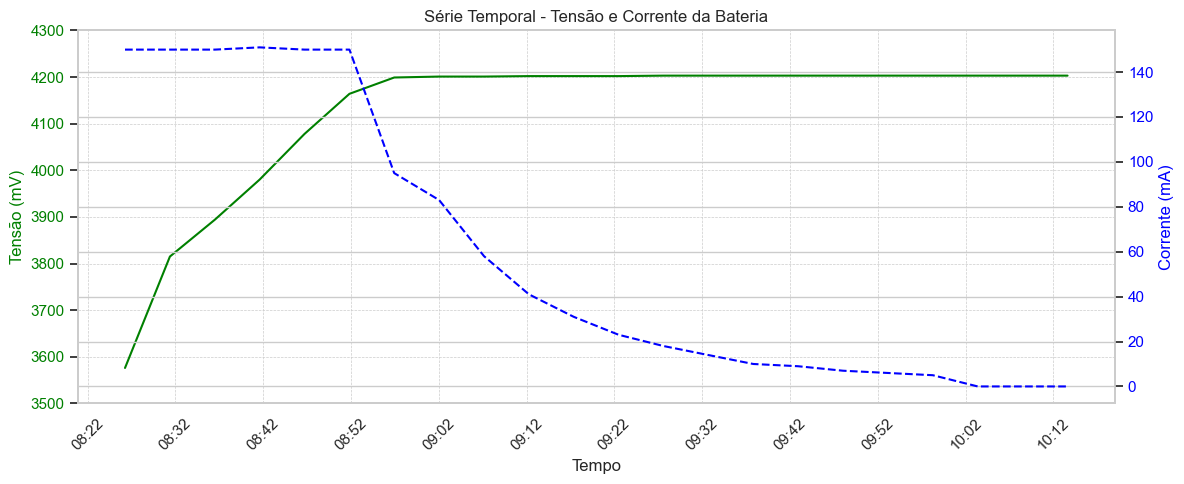

In [23]:
plot_time_series(
    df=frame,
    xlabel='Tempo',
    title='Série Temporal - Tensão e Corrente da Bateria',
    color_voltage='green',
    color_current='blue'
)